<a href="https://colab.research.google.com/github/sal-ath/DTS_MLT2_Face6/blob/152236035101-877/DTS_MLT2_FACE6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pengenalan Ekspresi Wajah ketika Diskusi**

## Runtime
Pastikan tipe Runtime **GPU** sebelum memulai, karena akan mempercepat proses

In [1]:
%tensorflow_version 2.x
import tensorflow as tf

print(tf.test.gpu_device_name())
print('Tensorflow version: {}'.format(tf.__version__))

/device:GPU:0
Tensorflow version: 2.8.2


## Mengarahkan penyimpanan pada Google Drive
Hal ini diperlukan, menurut saya, karena jika *dataset* kita letakkan di *directory* Google Colab, akan bisa hilang ketika kita buka Notebook berikutnya

In [2]:
from google.colab import drive
dir = '/content/drive'
drive.mount(dir)

Mounted at /content/drive


## Upload dataset images.zip ke Google Drive
- Letakkan dalam folder files, buat terlebih dahulu jika belum ada, dalam folder Colab Notebooks
- Ekstrak file images.zip tersebut

**Perlu diperhatikan, lakukan proses ini hanya sekali saja, atau ulangi jika diperlukan*

In [3]:
rdir = dir+'/MyDrive/Colab Notebooks/files'

In [5]:
import zipfile

loc_zip = rdir+'/images.zip'
zip_ref = zipfile.ZipFile(loc_zip, 'r')
zip_ref.extractall(rdir)
zip_ref.close()

## Folder dan Mempersiapkan Data
Membaca folder yang ada pada data gambar Train dan Validation sebagai acuan ekspresi pada tiap jenisnya. Sehingga dapat diketahui juga jumlah data tiap ekspresinya. Folder nantinya akan disimpan sebagai ekspresi dan file sebagai data train dan validasi

In [6]:
import os

mdir = rdir+'/images/'
td = mdir+'train'
vd = mdir+'validation'
#print(td)
tn = sorted(os.listdir(td))
print('Train: ',tn[:7])

vn = sorted(os.listdir(vd))
print('Validation: ',vn[:7])

for num in range(len(tn)):
    print(num,': ',tn[num],'',len(sorted(os.listdir(td+'/'+tn[num]))))


Train:  ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Validation:  ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
0 :  angry  3993
1 :  disgust  436
2 :  fear  4103
3 :  happy  7164
4 :  neutral  4982
5 :  sad  4938
6 :  surprise  3205


## Membaca Gambar

Membaca gambar-gambar yang ada pada folder Train maupun Validation. Tidak lupa juga menyimpan folder yang sudah diurutkan sebagai labelnya.

In [7]:
from tqdm import tqdm
import cv2
import numpy

emosi = tn
print(emosi)
counts = []
count = 0

train_images = []
train_labels = []

for num in range(len(emosi)):
    print(num,': ',emosi[num],'',len(sorted(os.listdir(td+'/'+emosi[num]))))
    counts.append(len(sorted(os.listdir(td+'/'+emosi[num]))))
    
    for nmfoto in tqdm(sorted(os.listdir(os.path.join(td+'/'+emosi[num])))):
        fotodir = os.path.join(td+'/'+emosi[num]+'/'+nmfoto)
#        print(fotodir)
        fotonya = cv2.imread(fotodir,cv2.IMREAD_GRAYSCALE)
        fotonya = cv2.resize(fotonya, (48,48))
        train_images.append(fotonya)

        label = int(num)
        train_labels.append(label)
#        print(label)

x_train = numpy.array(train_images)
y_train = numpy.array(train_labels)

print('x_train shape: {0}'.format(x_train.shape))
print('y_train shape: {0}'.format(y_train.shape))

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
0 :  angry  3993


100%|██████████| 3993/3993 [00:08<00:00, 481.11it/s]


1 :  disgust  436


100%|██████████| 436/436 [00:00<00:00, 454.18it/s]


2 :  fear  4103


100%|██████████| 4103/4103 [00:08<00:00, 475.65it/s]


3 :  happy  7164


100%|██████████| 7164/7164 [00:15<00:00, 476.43it/s]


4 :  neutral  4982


100%|██████████| 4982/4982 [00:10<00:00, 471.72it/s]


5 :  sad  4938


100%|██████████| 4938/4938 [00:10<00:00, 471.03it/s]


6 :  surprise  3205


100%|██████████| 3205/3205 [00:06<00:00, 467.60it/s]


x_train shape: (28821, 48, 48)
y_train shape: (28821,)


## Grafik dataset

Mengubah tipe label dan mengubah menjadi Bahasa Indonesia, kemudian menampilkan dalam bentuk grafik.

('angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise')
('Marah', 'Jijik', 'Takut', 'Senang', 'Netral', 'Sedih', 'Kejutan')


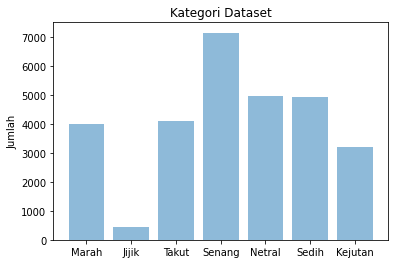

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

categories = tuple(emosi)
print(categories)
categories = ('Marah', 'Jijik', 'Takut', 'Senang', 'Netral', 'Sedih', 'Kejutan')
print(categories)

y_pos = numpy.arange(len(categories))

plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, categories)
plt.ylabel('Jumlah')
plt.title('Kategori Dataset')

plt.show()

## Menampilkan gambar

Menggunakan fungsi random, mengacak dari sejumlah data yang ada, dan menampilkannya hanya 16 gambar beserta label dan kodenya.

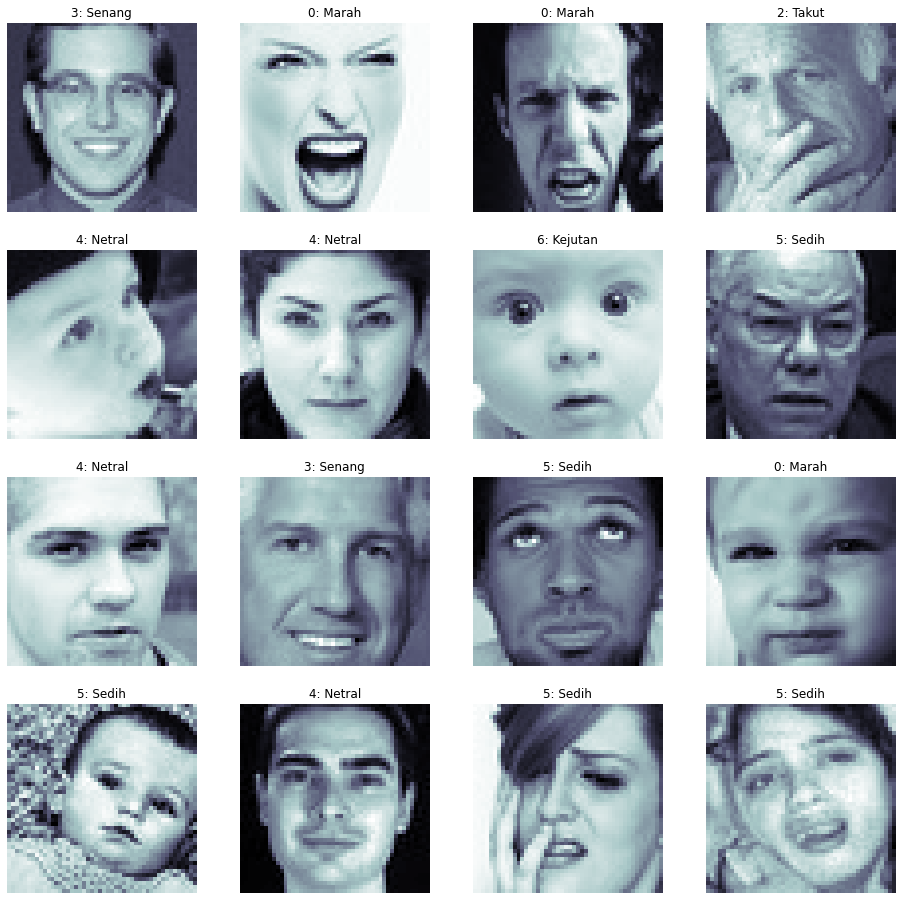

In [9]:
import random
import math

nfig = 16
ncol = math.sqrt(nfig)
fig = plt.gcf()
fig.set_size_inches(nfig, nfig)

for nfoto in range(nfig):
  fotoke = random.randint(0, x_train.shape[0])
  image = x_train[fotoke]
  label = y_train[fotoke]
  ax = plt.subplot(ncol, ncol, nfoto+1)
  plt.axis('off')
  ax.set_title(str(label)+': '+str(categories[label]))
  plt.imshow(image, cmap='bone')
plt.show()

## Persiapan Pemrosesan Data

Membagi antara data Training dan Test

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(len(x_train), 48, 48, 1)
x_test = x_test.reshape(len(x_test), 48, 48, 1)

print(x_train.shape)
print(x_test.shape)

(23056, 48, 48, 1)
(5765, 48, 48, 1)


## Melakukan Training Model

*   Memanggil beberapa paket fungsi yang diperlukan
*   Membuat model yang terdiri dari beberapa tumpuk layer dan menampilkan rangkumannya
*   Meng-compile model tersebut
*   Menggunakan strategi EarlyStopping untuk mengantisipasi jika val_accuracy tidak ada peningkatan, makan training dihentikan


In [13]:
%tensorflow_version 2.x
import tensorflow as tf

print(tf.test.gpu_device_name())
print('Tensorflow version: {}'.format(tf.__version__))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras import Model, Input

from tensorflow.keras.preprocessing.image import ImageDataGenerator

/device:GPU:0
Tensorflow version: 2.8.2


In [15]:
modelku = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(48, 48, 1)),
  tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
  tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'),
  tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'),
  tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(7, activation='softmax')
])

In [16]:
modelku.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 46, 46, 64)        640       
                                                                 
 conv2d_17 (Conv2D)          (None, 46, 46, 64)        36928     
                                                                 
 batch_normalization_8 (Batc  (None, 46, 46, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 22, 22, 64)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 22, 22, 128)      

In [17]:
adam = Adam(learning_rate=0.001)
modelku.compile(optimizer=adam,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [19]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10)
reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=5)

history = modelku.fit(x_train,
                    y_train,
                    batch_size=64,
                    epochs=100,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, reduce_learning_rate])

Epoch 1/100
361/361 [==============================] - 14s 40ms/step - loss: 0.2284 - accuracy: 0.9226 - val_loss: 1.8818 - val_accuracy: 0.6258 - lr: 7.2900e-04
Epoch 2/100
361/361 [==============================] - 14s 39ms/step - loss: 0.2133 - accuracy: 0.9291 - val_loss: 1.7643 - val_accuracy: 0.6375 - lr: 7.2900e-04
Epoch 3/100
361/361 [==============================] - 14s 40ms/step - loss: 0.1899 - accuracy: 0.9380 - val_loss: 1.9517 - val_accuracy: 0.6328 - lr: 7.2900e-04
Epoch 4/100
361/361 [==============================] - 14s 40ms/step - loss: 0.1877 - accuracy: 0.9364 - val_loss: 1.9519 - val_accuracy: 0.6206 - lr: 7.2900e-04
Epoch 5/100
361/361 [==============================] - 14s 39ms/step - loss: 0.1800 - accuracy: 0.9401 - val_loss: 2.0432 - val_accuracy: 0.6173 - lr: 7.2900e-04
Epoch 6/100
361/361 [==============================] - 14s 38ms/step - loss: 0.1743 - accuracy: 0.9408 - val_loss: 2.1024 - val_accuracy: 0.6205 - lr: 7.2900e-04
Epoch 7/100
361/361 [=======

Score awal yang di dapat dari training model

In [20]:
_, scorenya = modelku.evaluate(x_test, y_test)
print('Score awal: {}'.format(scorenya))

181/181 [==============================] - 2s 8ms/step - loss: 2.0312 - accuracy: 0.6295
Score awal: 0.6294882893562317


## Meningkatkan kemampuan model

Membuat daftar data kasar yang diperoleh dari data yang labelnya kurang sesuai dan melakukan training



In [21]:
hard_images = []
hard_labels = []

predictions = modelku.predict(x_test)
for i, v in enumerate(predictions):
    y_predict = numpy.argmax(v)
    y_real = y_train[i]
    if y_predict != y_real:
        image = x_train[i]
        hard_image = image.reshape(1, 48, 48, 1)
        hard_images.append(image)
        hard_labels.append(y_real)

x_hard = numpy.array(hard_images)
y_hard = numpy.array(hard_labels)

print(x_hard.shape)
print(y_hard.shape)

(4770, 48, 48, 1)
(4770,)


In [22]:
x_hard_train, x_hard_test, y_hard_train, y_hard_test = train_test_split(x_hard, y_hard, test_size=0.2)
history = modelku.fit(x_hard_train,
                        y_hard_train,
                        batch_size=64,
                        epochs=100,
                        validation_data=(x_hard_test, y_hard_test),
                        callbacks=[early_stopping, reduce_learning_rate])

Epoch 1/100
60/60 [==============================] - 4s 62ms/step - loss: 0.1076 - accuracy: 0.9633 - val_loss: 0.0169 - val_accuracy: 0.9937 - lr: 5.9049e-04
Epoch 2/100
60/60 [==============================] - 2s 41ms/step - loss: 0.0642 - accuracy: 0.9819 - val_loss: 0.0219 - val_accuracy: 0.9916 - lr: 5.9049e-04
Epoch 3/100
60/60 [==============================] - 2s 41ms/step - loss: 0.0629 - accuracy: 0.9796 - val_loss: 0.0144 - val_accuracy: 0.9937 - lr: 5.9049e-04
Epoch 4/100
60/60 [==============================] - 2s 39ms/step - loss: 0.0593 - accuracy: 0.9814 - val_loss: 0.0245 - val_accuracy: 0.9916 - lr: 5.9049e-04
Epoch 5/100
60/60 [==============================] - 2s 39ms/step - loss: 0.0516 - accuracy: 0.9809 - val_loss: 0.0199 - val_accuracy: 0.9937 - lr: 5.9049e-04
Epoch 6/100
60/60 [==============================] - 2s 39ms/step - loss: 0.0462 - accuracy: 0.9858 - val_loss: 0.0302 - val_accuracy: 0.9916 - lr: 5.9049e-04
Epoch 7/100
60/60 [===========================

Melakukan training ulang dan menggunakan proses lebih mendalam dengan memutar, membalik, memperbesar gambar

In [23]:
data_generator = ImageDataGenerator(featurewise_center=False,
                                    featurewise_std_normalization=False,
                                    rotation_range=10,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    zoom_range=.1,
                                    horizontal_flip=True)
flow = data_generator.flow(x_train, 
                           y_train, 
                           batch_size=64)

history = modelku.fit(flow,
                        epochs=100,
                        validation_data=(x_test, y_test),
                        callbacks=[early_stopping, reduce_learning_rate])

Epoch 1/100
361/361 [==============================] - 16s 43ms/step - loss: 1.1097 - accuracy: 0.6210 - val_loss: 1.0074 - val_accuracy: 0.6435 - lr: 5.3144e-04
Epoch 2/100
361/361 [==============================] - 16s 44ms/step - loss: 0.9944 - accuracy: 0.6487 - val_loss: 0.9829 - val_accuracy: 0.6479 - lr: 5.3144e-04
Epoch 3/100
361/361 [==============================] - 17s 48ms/step - loss: 0.9567 - accuracy: 0.6599 - val_loss: 0.9766 - val_accuracy: 0.6538 - lr: 5.3144e-04
Epoch 4/100
361/361 [==============================] - 15s 41ms/step - loss: 0.9429 - accuracy: 0.6631 - val_loss: 0.9713 - val_accuracy: 0.6484 - lr: 5.3144e-04
Epoch 5/100
361/361 [==============================] - 19s 53ms/step - loss: 0.9210 - accuracy: 0.6731 - val_loss: 0.9762 - val_accuracy: 0.6560 - lr: 5.3144e-04
Epoch 6/100
361/361 [==============================] - 15s 40ms/step - loss: 0.8969 - accuracy: 0.6786 - val_loss: 0.9936 - val_accuracy: 0.6448 - lr: 5.3144e-04
Epoch 7/100
361/361 [=======

Score setelah dilakukan peningkatan kemampuan

In [24]:
_, scoref = modelku.evaluate(x_test, y_test)
print('Score final: {}'.format(scoref))

181/181 [==============================] - 2s 9ms/step - loss: 1.0335 - accuracy: 0.6598
Score final: 0.6598438620567322


## Menyimpan model

*   Tipe h5
*   dan tipe yang lite



In [25]:
modelku.save('MLT2FACE6.h5')

In [26]:
converter = tf.lite.TFLiteConverter.from_keras_model(modelku)
tflite_model = converter.convert()
open("MLT2FACE6.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp2b2vqdtq/assets


19937280

## Pengujian

*   Membuat fungsi pengujian menggunakan foto
*   dan fungsi pengujian menggunakan live video



In [28]:
from tensorflow.keras.preprocessing import image

def prediksi_gambar(image_path):
    rgb_image = image.load_img(path=image_path,
                            color_mode='grayscale',
                            target_size=(48, 48))

    rgb_array = image.img_to_array(rgb_image)
    rgb_array = numpy.expand_dims(rgb_array, axis=0)

    rgb_display = numpy.array(rgb_array, 'float32')
    rgb_display = rgb_display.reshape([48, 48]);
    plt.imshow(rgb_display, cmap='bone')
    plt.axis('off')

    rgb_array = rgb_array / 255.0
    prediction = modelku.predict(rgb_array)
    plt.title('Prediksi: '+str(categories[int(numpy.argmax(prediction, axis=-1))]))
    plt.show()

    plt.bar(y_pos, prediction[0], align='center', alpha=0.5)
    plt.xticks(y_pos, categories)
    plt.ylabel('Persentase')
    plt.title('Grafik')
    plt.show()

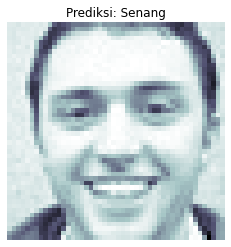

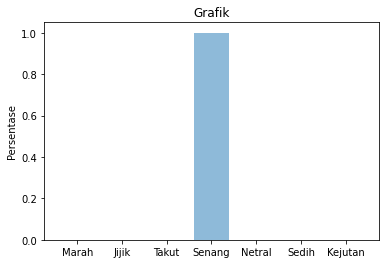

In [29]:
prediksi_gambar('30.jpg')

Pengujian menggunakan live video

Sumber:

*   https://colab.research.google.com/drive/1QnC7lV7oVFk5OZCm75fqbLAfD9qBy9bw#scrollTo=1nkSnkbkk4cC
*   https://github.com/NiiT-Kolkata/sentiment-analysis-face-emotion-recognition/blob/main/detect_video.py



In [30]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [31]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [32]:
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [33]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span> ";
      labelElement = document.createElement('span');
      labelElement.innerText = 'Persiapan..';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'Klik di sini untuk menghentikan!</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

<IPython.core.display.Javascript object>

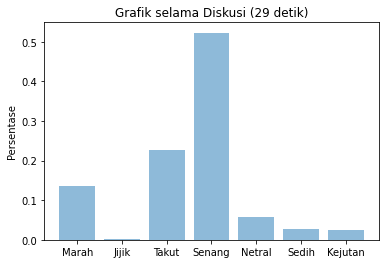

In [34]:
import tensorflow as tf
import numpy as np

from collections import Counter
import matplotlib.pyplot as plt
import time

model = tf.keras.models.load_model("MLT2FACE6.h5")
categories = ('Marah', 'Jijik', 'Takut', 'Senang', 'Netral', 'Sedih', 'Kejutan')
y_pos = np.arange(len(categories))

start = time.time()

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Memprediksi...'
# initialze bounding box to empty
bbox = ''
count = 0
npred=[]
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    final_img = cv2.resize(gray,(48,48),1)
    final_img = np.expand_dims(final_img,axis=0) # need 4th dimension
    final_img = final_img/255 # normalizing             

    prediction = model.predict(final_img)
#    print(prediction)
#    print(str(categories[int(np.argmax(prediction, axis=-1))]))
    npred.append(int(np.argmax(prediction, axis=-1)))
    ekspresi = str(categories[int(np.argmax(prediction, axis=-1))])

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(100,149,237),2)
    
      cv2.putText(bbox_array,ekspresi,(x + int(w/15),y + int(h/1.1)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(100,149,237),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

stop = time.time()
ntme = int(stop - start)
#print("The time of the run:", str(ntme))

#print(npred)
#print(Counter(npred).keys()) # equals to list(set(words))
#print(Counter(npred).values()) # counts the elements' frequency

plt.bar(y_pos, prediction[0], align='center', alpha=0.5)
plt.xticks(y_pos, categories)
plt.ylabel('Persentase')
plt.title('Grafik selama Diskusi ('+str(ntme)+' detik)')
plt.show()